In [2]:
import torch
from model import EdgePredictorGNN
from prepare_data import train_loader, val_loader

Created 390012 Data objects, each with 6 nodes, node feature shape torch.Size([6, 2]), and 9 edges.
Train samples: 312009, Validation samples: 78003


In [14]:
for batch in train_loader:
    data = batch
    break
#torch.cat((val_preds[0:100], val_targets[0:100]), dim=1)
min(val_preds)

tensor([-1.5578])

Evaluating model...
Train set: MSE = 0.449774
Validation set: MSE = 0.451348


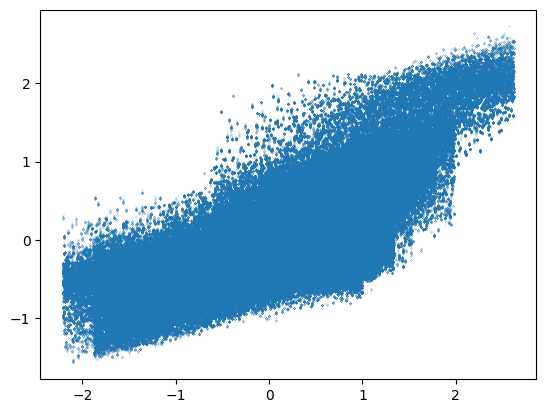

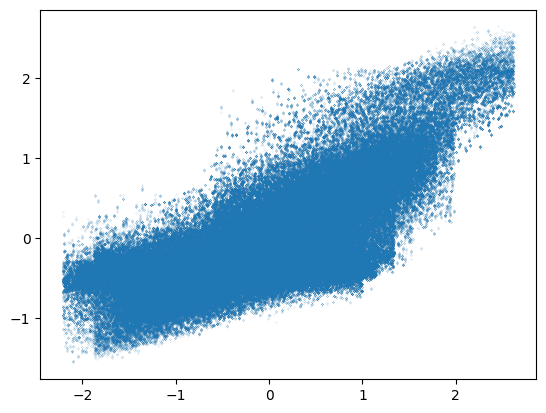

In [3]:
best_model = 8  # Change this to load a different epoch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
in_channels = 2
hidden_channels = 64
edge_out_channels = 1

# Load model
model = EdgePredictorGNN(in_channels, hidden_channels, edge_out_channels).to(device)
model.load_state_dict(torch.load(f"model_epoch_{best_model}.pt", map_location=device))
model.eval()

def predict(loader, name):
	all_preds = []
	all_targets = []
	with torch.no_grad():
		for batch in loader:
			batch = batch.to(device)
			pred = model(batch)
			all_preds.append(pred.cpu())
			all_targets.append(batch.edge_attr.cpu())
	preds = torch.cat(all_preds, dim=0)
	targets = torch.cat(all_targets, dim=0)
	mse = torch.mean((preds - targets) ** 2).item()
	print(f"{name} set: MSE = {mse:.6f}")
	return preds, targets

print("Evaluating model...")
train_preds, train_targets = predict(train_loader, "Train")
val_preds, val_targets = predict(val_loader, "Validation")

import matplotlib.pyplot as plt

plt.scatter(train_targets[:,0], train_preds[:,0], s=0.005)
plt.show()

plt.scatter(val_targets[:,0], val_preds[:,0], s=0.005)
plt.show()

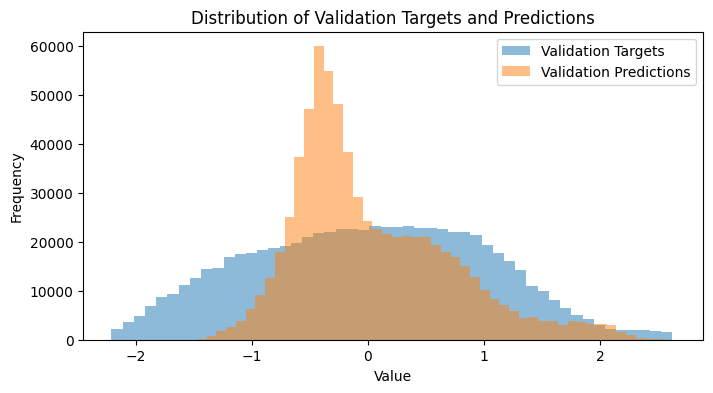

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten to 1D for overall distribution
val_targets_flat = val_targets.cpu().numpy().flatten()
val_preds_flat = val_preds.cpu().numpy().flatten()

plt.figure(figsize=(8, 4))
plt.hist(val_targets_flat, bins=50, alpha=0.5, label='Validation Targets')
plt.hist(val_preds_flat, bins=50, alpha=0.5, label='Validation Predictions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Validation Targets and Predictions')
plt.legend()
plt.show()

In [ ]:
# Histogram for train_preds and train_targets
targets_flat = train_targets.cpu().numpy().flatten()
preds_flat = train_preds.cpu().numpy().flatten()

plt.figure(figsize=(8, 4))
plt.hist(targets_flat, bins=50, alpha=0.5, label='Train Targets')
plt.hist(preds_flat, bins=50, alpha=0.5, label='Train Predictions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Train Targets and Predictions')
plt.legend()
plt.show()